
# Decision Tree Classifier — Real-World Project (Bank Marketing Dataset)

 **Decision Tree model** using the **UCI Bank Marketing Dataset** to predict whether a client will subscribe to a term deposit.


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

sns.set(style="whitegrid")
print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [2]:
# Step 2: Load Dataset
df = pd.read_csv(r"D:\MTECH\ML case study\decision tree\bank.csv", sep=';')
print("Shape of Dataset:", df.shape)
df.head()



FileNotFoundError: [Errno 2] No such file or directory: 'D:\\MTECH\\ML case study\\decision tree\\bank.csv'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB

Missing values per column:
 age          0
job          0
marital      0
education    0
default   

C:\Users\Goodday\AppData\Local\Temp\ipykernel_15012\2337844265.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='coolwarm')


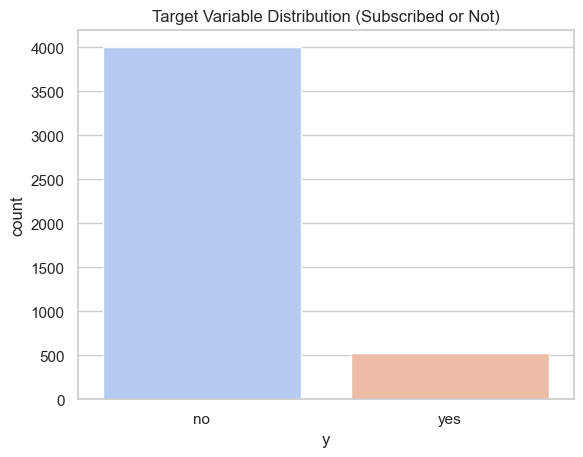

In [ ]:

# Step 3️⃣: Data Exploration
df.info()
print("\nMissing values per column:\n", df.isnull().sum())

sns.countplot(x='y', data=df, palette='coolwarm')
plt.title("Target Variable Distribution (Subscribed or Not)")
plt.show()


In [ ]:

# Step 4️⃣: Encode Categorical Variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [ ]:

# Step 5️⃣: Train-Test Split
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (3616, 16)
Testing set shape: (905, 16)


In [ ]:

# Step 6️⃣: Train Decision Tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("✅ Model training complete!")


✅ Model training complete!


Accuracy: 0.890

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       801
           1       0.53      0.33      0.40       104

    accuracy                           0.89       905
   macro avg       0.72      0.64      0.67       905
weighted avg       0.87      0.89      0.88       905



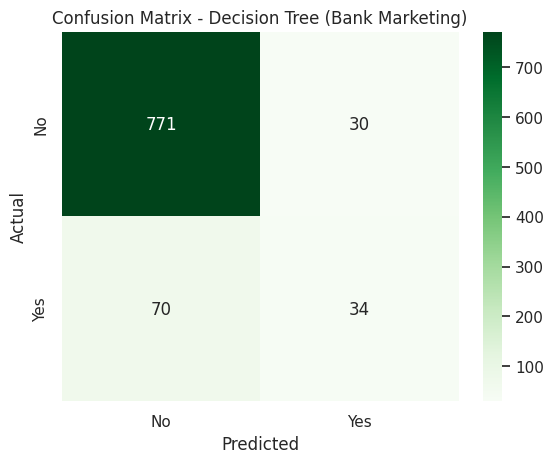

In [ ]:

# Step 7️⃣: Evaluate Model
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.title("Confusion Matrix - Decision Tree (Bank Marketing)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


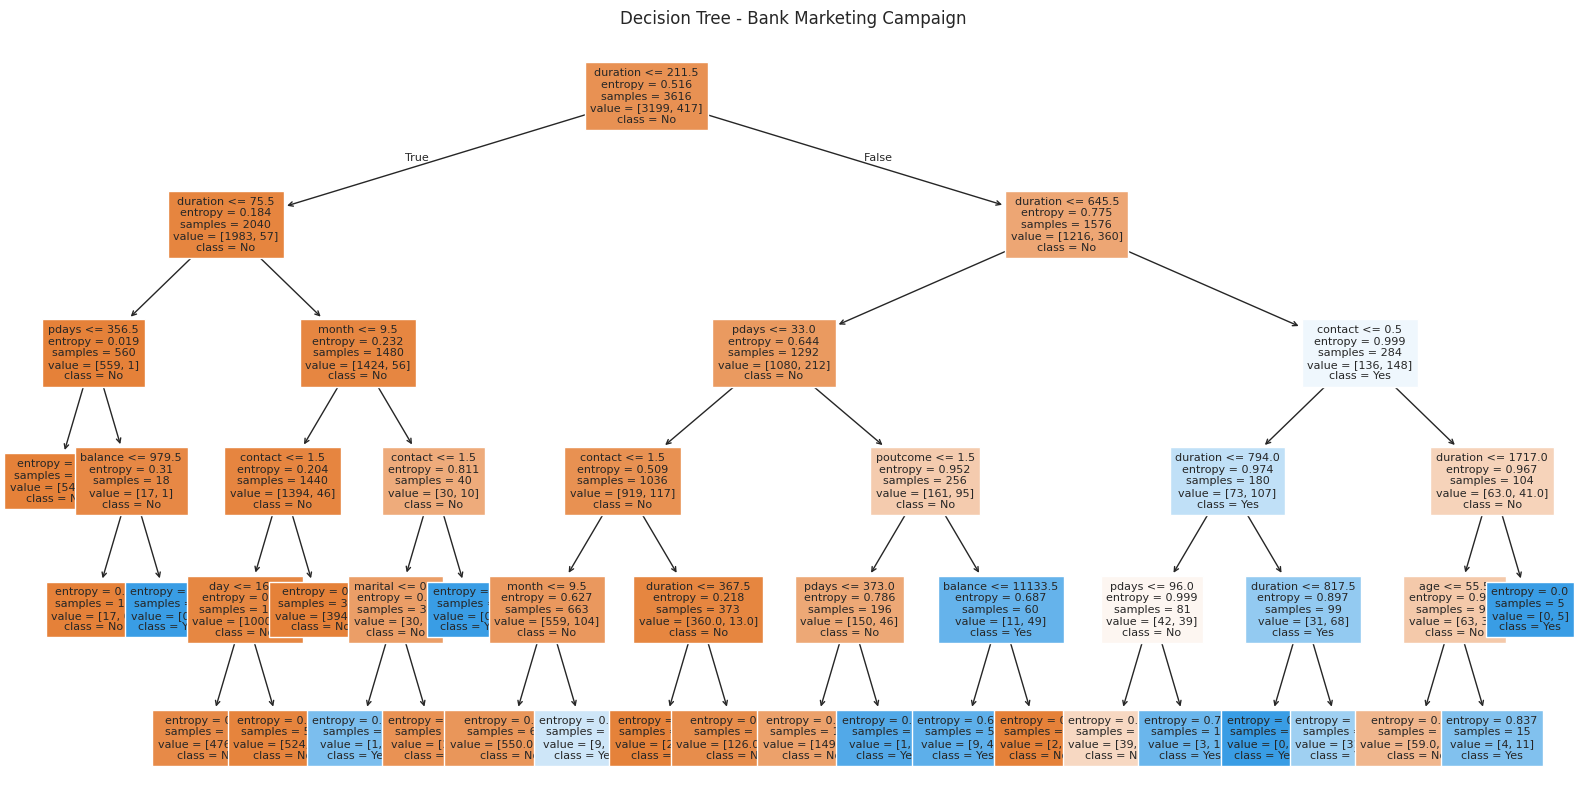

In [ ]:

# Step 8️⃣: Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No','Yes'], filled=True, fontsize=8)
plt.title("Decision Tree - Bank Marketing Campaign")
plt.show()


/tmp/ipython-input-2638768839.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')


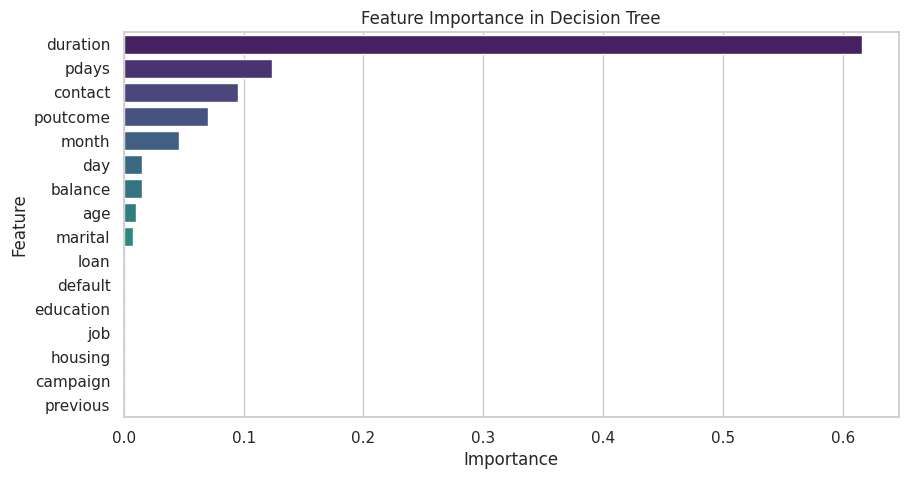

,Feature,Importance
11,duration,0.615918
13,pdays,0.123749
8,contact,0.095509
15,poutcome,0.069890
10,month,0.045982
9,day,0.015579
5,balance,0.015489
0,age,0.010553
2,marital,0.007331
7,loan,0.000000


In [ ]:

# Step 9️⃣: Feature Importance
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title("Feature Importance in Decision Tree")
plt.show()

importances.head(10)


In [ ]:

# Step 🔟: Save Model
joblib.dump(model, "bank_dt_model.pkl")
joblib.dump(X.columns.tolist(), "bank_features.pkl")
print("✅ Model and feature list saved successfully!")


✅ Model and feature list saved successfully!


In [ ]:
# Step 11: Summary Insights
print("""
📊 Model Summary
----------------
Algorithm: Decision Tree (Entropy, max_depth=5)
Accuracy: {:.2f}%
Top Features: {}
Interpretation: Clients with higher duration, successful previous outcomes, and higher balances are more likely to subscribe.
""".format(acc*100, list(importances.head(3)['Feature'])))



📊 Model Summary
----------------
Algorithm: Decision Tree (Entropy, max_depth=5)
Accuracy: 88.95%
Top Features: ['duration', 'pdays', 'contact']
Interpretation: Clients with higher duration, successful previous outcomes, and higher balances are more likely to subscribe.

